In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
from sklearn import model_selection

In [10]:
import matplotlib

In [11]:
from sklearn.metrics import f1_score

In [12]:
from matplotlib import pyplot as plt

In [13]:
import seaborn as sns

In [14]:
df=pd.read_csv("C:\Windows\Lenovo\\adult.csv")

In [15]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
df.drop("fnlwgt",axis=1,inplace=True)

In [18]:
df.isnull().sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [19]:
for i in df.columns:
    t = df[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in age
0
The Value Counts of ? in workclass
1836
The Value Counts of ? in education
0
The Value Counts of ? in education.num
0
The Value Counts of ? in marital.status
0
The Value Counts of ? in occupation
1843
The Value Counts of ? in relationship
0
The Value Counts of ? in race
0
The Value Counts of ? in sex
0
The Value Counts of ? in capital.gain
0
The Value Counts of ? in capital.loss
0
The Value Counts of ? in hours.per.week
0
The Value Counts of ? in native.country
583
The Value Counts of ? in income
0


In [20]:
df = df[df.occupation != '?']

df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

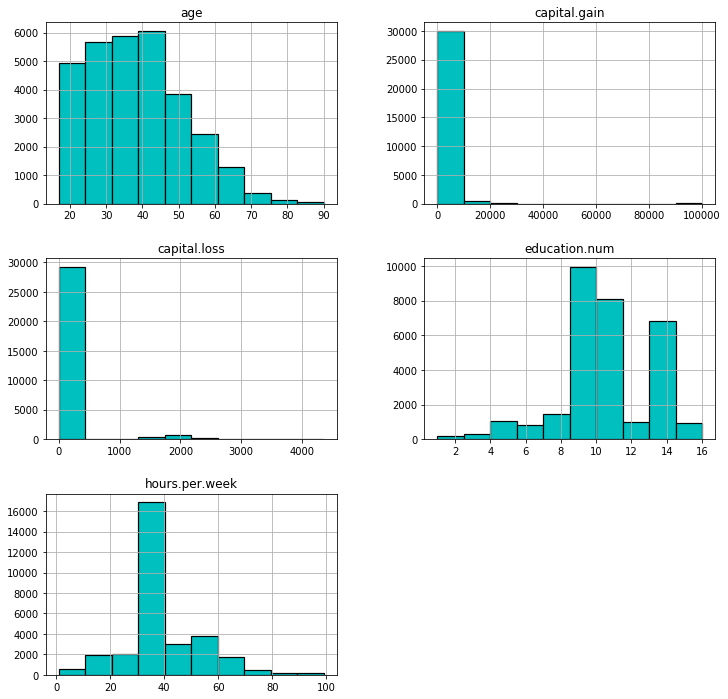

In [21]:
# Distribution of Different Features of the Dataset
distribution = df.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

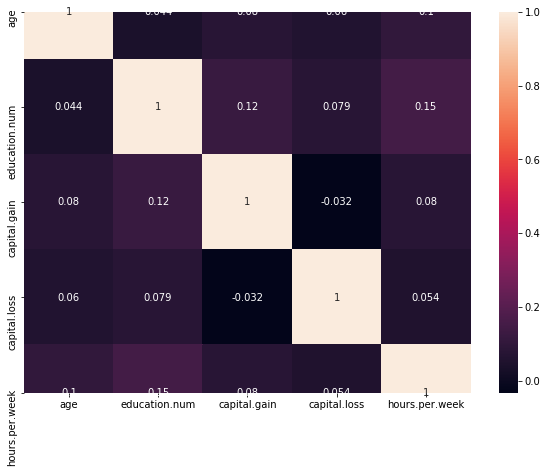

In [22]:
# This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df.corr(), annot = True);

In [23]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [24]:
df.shape

(30718, 14)

In [25]:
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,10.130314,1106.037079,88.910216,40.949313
std,13.118227,2.562469,7497.863364,405.657203,11.985382
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [26]:
from sklearn.preprocessing import LabelEncoder 

In [27]:
le=LabelEncoder()

In [28]:
for col in df.columns:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

In [29]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,11,9,6,3,1,4,0,0,4356,18,39,0
3,54,2,5,4,0,6,4,4,0,0,3900,40,39,0
4,41,2,15,10,5,9,3,4,0,0,3900,40,39,0
5,34,2,11,9,0,7,4,4,0,0,3770,45,39,0
6,38,2,0,6,5,0,4,4,1,0,3770,40,39,0


In [30]:
x=df

In [31]:
y=df['income']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.99,random_state=42)

In [33]:
model=[]

In [34]:
model.append(('LR',LogisticRegression()))
model.append(('LDA',LinearDiscriminantAnalysis()))
model.append(('KNN',KNeighborsClassifier()))
model.append(('DTC',DecisionTreeClassifier()))
model.append(('NB',GaussianNB()))

In [35]:
result=[]

In [36]:
names=[]

In [37]:
for name,models in model:
    kfold=model_selection.KFold(n_splits=10,random_state=7)
    cv_result=model_selection.cross_val_score(models,x_train,y_train,cv=kfold,scoring='accuracy')
    result.append(cv_result)
    names.append(name)
    msg="%s,%f(%f)"%(name,cv_result.mean(),cv_result.std())
    print(msg)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LR,0.993548(0.012903)
LDA,0.834086(0.072947)
KNN,0.850860(0.097957)


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


DTC,1.000000(0.000000)
NB,0.983763(0.021722)


conclusion 

here we can see that decisiontreeClassifier has attained 100% accuracy in predicting the outcomes